# What is a Copula?

- A copula is a multivariate distribution $C(U_1, U_2, ...., U_n)$ such that marginalizing gives $U_i \sim \operatorname{\sf Uniform}(0, 1)$. 
- The main application of Copula is to help us achieve multivariate distributions from marginals
- Loosely speaking, Marginals + Copulas (which specify dependency structure) $\implies$ Joint DF (multivariate) 


# What are the main theories invovled?

The 3 main important theory are as follows
* Probability Intergral Transform
    - Turns a RV, $X$ into a uniform one $F_X(X) \sim U_X(0,1)$
    - Hence, $F_X(X) \sim U_X(0,1) \implies X \sim F^{-1}_X(U_X)$
* Quantile Transform
    - $P(F^{-1}(U) \leq x) = F(x)$ 
    - $P(U \leq F(x)) = F(x)$ (by definition of Uniform Distribution)
* Sklar's Theorem 
    - There exist a copula C such that $F(X, Y) = C(F_X(X), F_Y(Y))$
    - $F(X, Y) = P(X \leq x , Y \leq y)$
    * $P(X \leq x , Y \leq y =  P(F_X^{-1}(U_X) \leq x , F_Y^{-1}(U_Y) \leq y)$ (From Probability Intergral Transform)
    * $P(F_X^{-1}(U_X) \leq x , F_Y^{-1}(U_Y) \leq y)  =  P(U_X \leq F_X(x) , U_Y \leq F_Y(y) $ (From Quantile Transform)



# Intuition: By Thomas Weicki

- We look at various rivers and 
    - For every river 
        - We look at the maximum level of that river over a certain time-period (Gumbel Distribution)
        - We count how many months each river caused flooding (Beta Distribution)
    - The maximum level and number of floodings is going to be correlated. 
    - However, we only specified the distributions (marginals) for the individual variables
    - We need to model the joint distribution of both of these together.

# Intuition: Demonstration
- Step 1: Generate uniform RV $F_X(X)$
    - Code: x = stats.uniform(0, 1)
    - Formula: $F_X(X) \sim U_X(0,1)$ 
- Step 2: Transform Uniform RV to a desired CDF
    - Code: x_trans = norm.ppf(x)
    - Formula: $P(F^{-1}(U) \leq x) = F(x)$ 

Text(0.5, 1.0, 'Marginal')

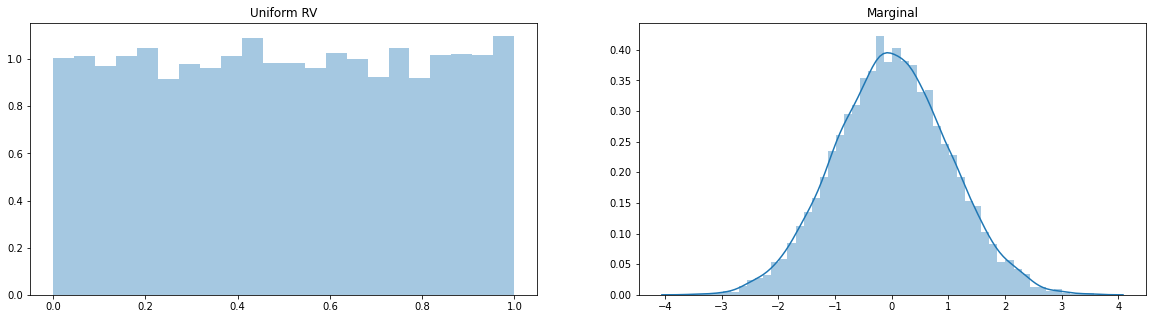

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, ax_arr = plt.subplots(nrows = 1 , ncols = 2 ,figsize=(20,5))

# Step 1
# This is the "Probability Integral Transform step" where we generate Uniform RV between 0 and 1
x = stats.uniform(0, 1).rvs(10000)
sns.distplot(x, ax = ax_arr[0] , kde=False, norm_hist=True).set_title("Uniform RV")

# Step 2
# This is the "Quantile Transform step" where we transform the Uniform RV via the inverse CDF
norm = stats.distributions.norm()
x_trans = norm.ppf(x)
sns.distplot(x_trans , ax = ax_arr[1] ).set_title("Marginal")

# Intuition: Visualize the Original VS Transformed Variables

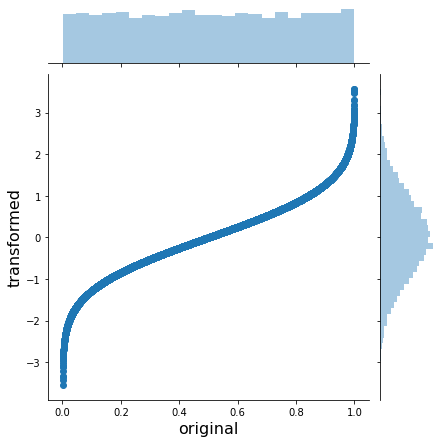

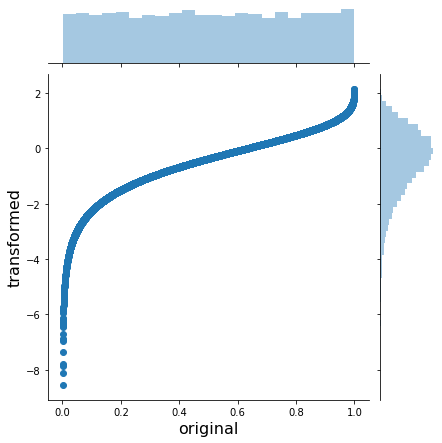

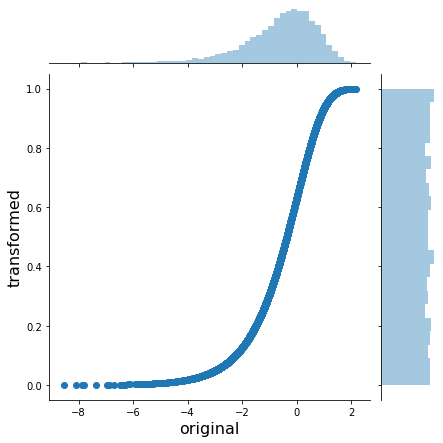

In [7]:
# Do a joint plot 
h = sns.jointplot(x, x_trans, stat_func=None )
h.set_axis_labels('original', 'transformed', fontsize=16);

## We can also do this for arbitrary (univariate) probability distributions, like the Beta:
# beta = stats.distributions.beta(a=10, b=3)
# x_trans = beta.ppf(x)
# h = sns.jointplot(x, x_trans, stat_func=None)
# h.set_axis_labels('orignal', 'transformed', fontsize=16);


## Or Gumbel
gumbel = stats.distributions.gumbel_l()
x_trans = gumbel.ppf(x)
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16);

## Then transform back again with the inverse of the inverse Cdf, which is the CDF
x_trans_trans = gumbel.cdf(x_trans)
h = sns.jointplot(x_trans, x_trans_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16);

# Example: Simulation of Gaussian Copula with different marginals

- If we assume that our data has multivariate-normal dependencies, we can use a Gaussian Copula
    - $C(u_1, u_2, ...u_n) = \Phi_\Sigma(\Phi^{-1}(u_1), \Phi^{-1}(u_2), ... \Phi^{-1}(u_n))$ 
    - $\Phi_\Sigma$ represents the CDF of a MultivariateNormal, with covariance $\Sigma$ and mean 0
    - $\Phi^{-1}$ is the inverse CDF for the standard normal.
    - Note a Gaussian Copula is a distribution over the unit hypercube $[0, 1]^n$ with uniform marginals.
  
- Specfically, we are trying to achieve this 
    - $F(X_1, X_2) = C(F_{X_1}(X_1), F_{X_2}(X_2))$
    - Step 1: $\Phi_\Sigma(X_1,X_2)$
        - Simulate a Multivariate Gaussian  with predefined dependency structure 
        - stats.multivariate_normal generates random samples X_1 ,X_2 in the matrix x
    - Step 2: $\Phi_\Sigma(F_{X_1}(X_1),F_{X_2}(X_2)) = \Phi_\Sigma(U_1, U_2)$
        - Transform the RV using a Normal CDF to make them Uniformly distributed 
        - norm = stats.norm()
        - x_unif = norm.cdf(x)
    - Step 3: $\Phi_\Sigma(F_{X_1}^{-1}(u_1), F_{X_2}^{-1}(u_2)) = C(U_1, U_2)$
        - Using our assumed marginal, apply its inverse CDF to transform uniform dimension to be whatever distributed
        - m1.ppf(x_unif[:, 0])


(100000, 2)
[[-0.18769777  0.002196  ]
 [-0.3487068  -0.27799858]
 [-0.86761442 -0.40236376]
 [-0.84913537 -0.93724464]
 [ 0.57874098  0.48366335]
 [ 0.5957078   1.22166124]
 [ 0.87007961  0.62960258]
 [-0.00879368 -0.13742564]
 [-0.80761599 -0.46448419]]


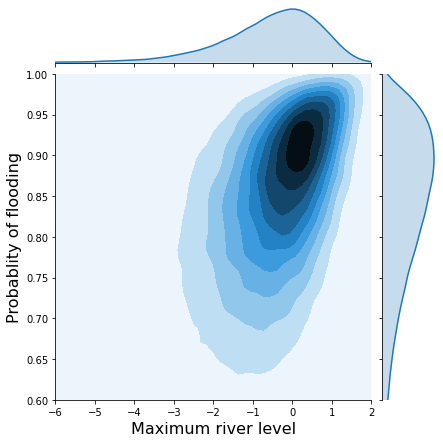

In [8]:
# Step 1: Generate random samples from multivariate normal with correlation .5
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], 
                                                     [0.5, 1.]])

x = mvnorm.rvs(100000)
print(x.shape)
print(x[1:10,:])

# Step 2:
norm = stats.norm()
x_unif = norm.cdf(x)

# Plot it
# h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None);
# h.set_axis_labels('X1', 'X2', fontsize=16);

# h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex', stat_func=None)
# h.set_axis_labels('Y1', 'Y2', fontsize=16);

# Step 3:
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = m1.ppf(x_unif[:, 0])
x2_trans = m2.ppf(x_unif[:, 1])

h = sns.jointplot(x1_trans, x2_trans, kind='kde', xlim=(-6, 2), ylim=(.6, 1.0), stat_func=None);
h.set_axis_labels('Maximum river level', 'Probablity of flooding', fontsize=16);

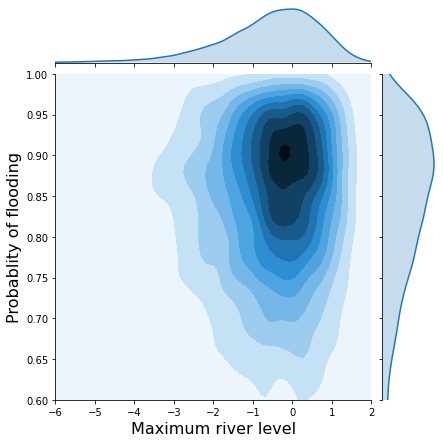

In [9]:
# Compare without a dependency structure
x1 = m1.rvs(10000)
x2 = m2.rvs(10000)

h = sns.jointplot(x1, x2, kind='kde', xlim=(-6, 2), ylim=(.6, 1.0), stat_func=None);
h.set_axis_labels('Maximum river level', 'Probablity of flooding',  fontsize=16);

# Referenced
- [Thomas Wiecki's post](https://twiecki.github.io/blog/2015/11/10/mcmc-sampling/) 

- [Google's Tensorflow Probability github page](https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Gaussian_Copula.ipynb)

- Quantitative Risk Management (Alexander McNiel, Rudier Frey, Paul Embretch)

